# __Section 2__ - Algorithm Explanation

### Algorithm Selection

Logistic regression performs well with binary target variables and offers modeling transparency into the relative weights of factors in the model.  As Click Through Rate Prediction is a binary classification problem, we are implementing Logistic Regression with Gradient Descent.   


### Logistic Regression Theory

Logistic Regression models the probability of the outcome variable.  Therefore we need to find the relationship between $p(X) = Pr(Y = 1 | X)$ and $X$ such that $p(X)$ is between $0$ and $1$.  

In linear regression, we fit a staight line to the data and it should be noted that $y$ is not bounded between 0 and 1, it can take any value.

\begin{equation*}
y = \beta_0 + \beta_1{x_1} + \cdot \cdot \cdot +\beta_n{x_n}
\end{equation*}

Whereas in logistic regression, the outcome is bounded between 0 and 1.  To avoid $p(X)$ having a value less than zero $(p(X) < 0)$ or greater than 1 $(p(X) > 1)$ when a straight line is fit to binary response, we model $p(X)$ using a logistic function that outputs values between 0 and 1:

\begin{equation*}
p(X) = \frac{ e^{\theta^T\cdot{x}}}{ 1 + e^{\theta^T\cdot{x}}}
\end{equation*}
where $\theta^T\cdot{x} = \theta_0{x_0} + \theta_1{x_1} + \cdot \cdot \cdot +\theta_n{x_n}$ and $x_0 = 1$

The logistic function always produces a $'S'$ shaped curve and so we get predictions between $0$ and $1$.  To fit the above model, we use the $'maximum$ $likelihood$ $method'$.  The equation can be re-written as:

\begin{equation*}
\frac{p(X)}{1 - p(X)} =  e^{\theta^T\cdot{x}}
\end{equation*}

where the quantity on the left hand side is called the "odds".  Taking $log$ on both sides shows that the log-odds or the $logit$ is linear in $X$:

\begin{equation*}
log \left( \frac{p(X)}{1 - p(X)} \right) =  \theta^T\cdot{x}
\end{equation*}


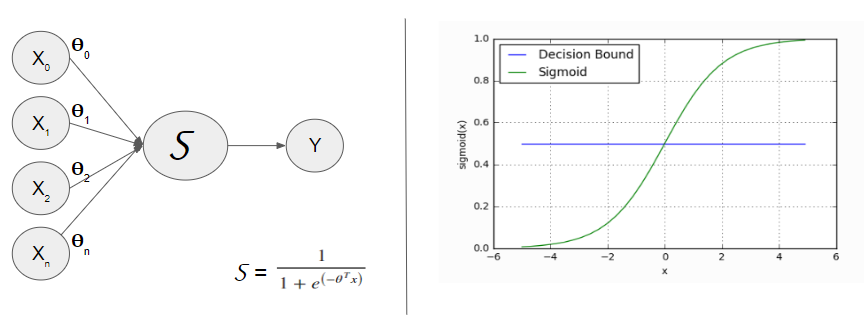

In [69]:
from IPython.display import Image
Image(filename="logreg.png")

The linear regression hypothesis is:

\begin{equation*}
h_ \theta (x) =  \theta^Tx
\end{equation*}

For classification, we hypothesize as:

\begin{equation*}
h_ \theta (x) =  g\left( \theta^Tx \right)
\end{equation*}

where we define the $Sigmoid$ $function$ or $Logistic$ $function$ as:

\begin{equation*}
g\left( z \right) = \frac{1}{1 + e^\left(-z \right)}
\end{equation*}

Therefore our hypothesis can be written as:

\begin{equation*}
h_ \theta (x) =  \frac{1}{1 + e^\left(- \theta^Tx \right) }
\end{equation*}

As the sigmoid function is not convex, the loss function in logistic regression cannot be derived using the expectation maximization method as it would not reach a global minima.  In order to reach a global minima, we use the cross-entropy loss function:

\begin{equation*}
Cost(h_ \theta (x), y) = 
\begin{cases}
  -log(h_ \theta(x)) \hspace{20mm} if \quad y = 1 \\
  -log(1 - h_ \theta(x)) \hspace{13mm} if \quad y = 0
\end{cases}
\end{equation*}

The two cases can be combined to give:

\begin{equation}
Cost( h_ \theta(x), y) =   -y log(h_ \theta(x)) - (1-y) log( 1 - h_ \theta(x) )
\end{equation} 

We can find the average loss by applying the cost function to all examples in the dataset, then taking the average:

\begin{equation*}
J(\theta) = -\frac{1}{N} \sum_{i=1}^{N} \bigg[y^{(i)} log(h_ \theta(x^{(i)})) + (1-y^{(i)}) log(1 - h_ \theta(x^{(i)})) \bigg]
\end{equation*}

The gradient is the partial derivative of the loss function with respect to the $\theta$s. For the sake of clarity in the derivation of the gradient equation, we will use $\theta^Tx$ in place of $h_ \theta (x) $, one record and therfore omit the summation and $-\frac{1}{N}$ terms:


\begin{align*}
\frac{\partial J(\theta) }{\partial \theta_j} &= \frac{\partial }{\partial \theta_j}\bigg[y log(h_ \theta(x)) + (1-y) log( 1 - h_ \theta(x) )\bigg] \\
&= \frac{\partial }{\partial \theta_j}\bigg[y log(\sigma(\theta^Tx)) + (1-y) log( 1 - \sigma(\theta^Tx) )\bigg] \\
&= \bigg[ \frac{y}{\sigma(\theta^Tx)} - \frac{1 - y}{1 - \sigma(\theta^Tx)} \bigg]\frac{\partial }{\partial \theta_j}\sigma(\theta^Tx) \\
&= \bigg[ \frac{y}{\sigma(\theta^Tx)} - \frac{1 - y}{1 - \sigma(\theta^Tx)} \bigg]\sigma(\theta^Tx)[1 - \sigma(\theta^Tx)]x_j \qquad\qquad chain \: rule \: + \: derivative \: of \: \sigma\\
&= \bigg[ \frac{y - \sigma(\theta^Tx)}{\sigma(\theta^Tx) (1 - \sigma(\theta^Tx))} \bigg]\sigma(\theta^Tx)[1 - \sigma(\theta^Tx)]x_j \\
&= \big[y - \sigma(\theta^Tx)\big]x_j
\end{align*}


Finally, taking into account the summation and $-\frac{1}{N}$ terms, the above equation can be re-written as :
\begin{equation*}
\nabla J(\theta) = \frac{1}{N} \sum_{i=1}^{N}(h_ \theta(x^{(i)})- y^{(i)}) \cdot {x_j}^{(i)}
\end{equation*}

We then update the model parameters; $\alpha$ is the learning rate:

\begin{equation*}
\theta_{new} = \theta_{old} - \nabla J(\theta) * \alpha 
\end{equation*}

Including the regularization parameter gives the following equations:

**Ridge**

\begin{equation*}
\nabla J(\theta) = \frac{1}{N} \sum_{i=1}^{N}(h_ \theta(x^{(i)})- y^{(i)}) \cdot {x_j}^{(i)} + 2\lambda\theta
\end{equation*}

**Lasso**

\begin{equation*}
\nabla J(\theta) = \frac{1}{N} \sum_{i=1}^{N}(h_ \theta(x^{(i)})- y^{(i)}) \cdot {x_j}^{(i)}+ \lambda|\theta|
\end{equation*}


**Reference**:

__1__    An Introduction to Statistical Learning with applications in R

__2__    Andrew Ng's Coursera lecture videos on Logistic Regression

__3__    https://web.stanford.edu/class/archive/cs/cs109/cs109.1178/lectureHandouts/220-logistic-regression.pdf


### Toy Example

In order to illustrate logistic regression, let's consider a toy example with dummy data:

__1.__ We have created 5 rows of data with one numeric feature X1 and one categorical feature with two states which has been one-hot encoded to  X2 and X3.  Y is the outcome variable that takes values $0$ or $1$.  The feature matrix is augmented with X0 as the first column so that the bias term can be added to the weights vector and the computations can be handled using matrix dot product.

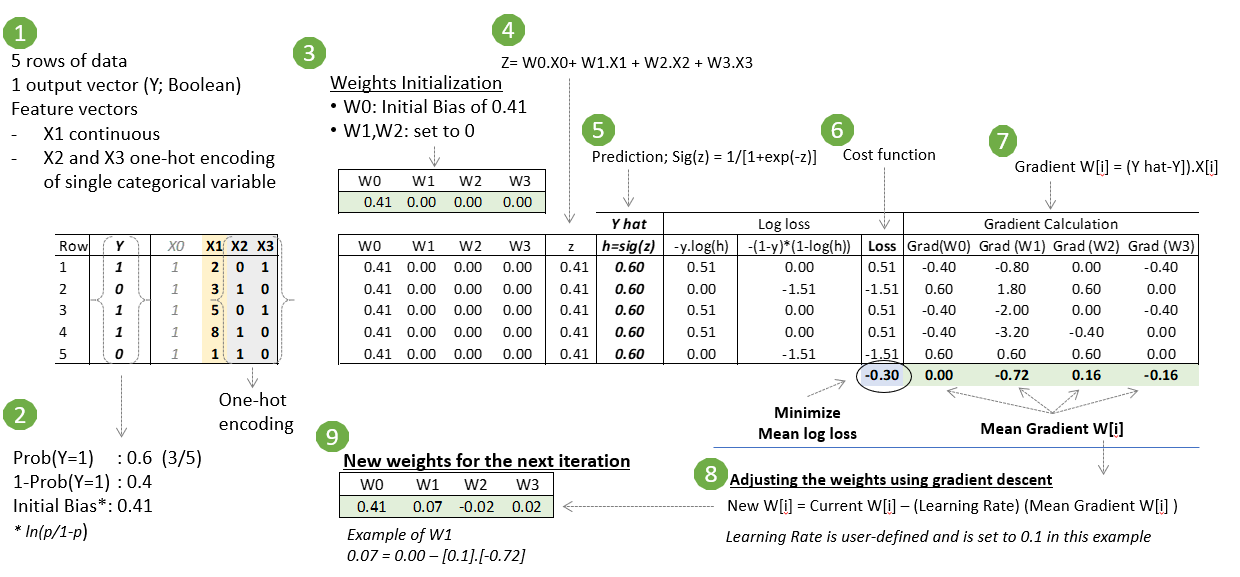

In [70]:
Image(filename="step1.png")

__2.__ Here we have $Y = 1$ in $3$ out of $5$ records.  Therefore $P(Y=1)$ is 0.6 $(=p)$ and $P(Y=0)$ is 0.4 $(= (1-p))$.  We calculate the $logit$ as $ln(p/(1-p))$ and it is equal to 0.41.

__3.__ The weights vector $(\theta$ or $W)$: It is a $1$ x $(N+1)$ dimensional vector.  The first term is the bias which is set to the logit calculated in step 2.  The remaining N weights correspond to the N features and are initialized to zero.  This is our baseline model.

__4.__ Linear function $(z)$ : This is a linear equation of the features and weights $(\theta^Tx)$.  This is an intermediate step as the logistic regression hypothesis is that the log odds is linear in the  **X**s.

__5.__ Prediction $(h_{\theta}$ or $\hat{y})$ : We pass the $z$ from step 4 through a logistic or sigmoid function to get the prediction.  As stated in the theory, we calculate it as $h_ \theta (x) =  \frac{1}{1 + e^\left(- \theta^Tx \right) }$  

__6.__ Loss $(J(\theta))$: Next we calculate the loss for each record as $-y log(h_ \theta(x)) - (1-y) log( 1 - h_ \theta(x) )$ and then take the average loss over all records to compute the mean loss for the first iteration.

__7.__ Gradient $(\nabla J(\theta))$ : Similarly, we first calculate the gradient for each of the weights in every record.  Then we average each weight over all records to get the gradient vector.  

__8.__ Update weights vector $\theta$ or $W$ : Finally we update the weights as new weights = old weights - learning rate times the gradient.  Learning rate is a *scalar* that we define as a hyperparameter.  

__9.__ The updated weights are used in the next iteration which  repeats steps 4 through 8.  We show the second iteration below: 

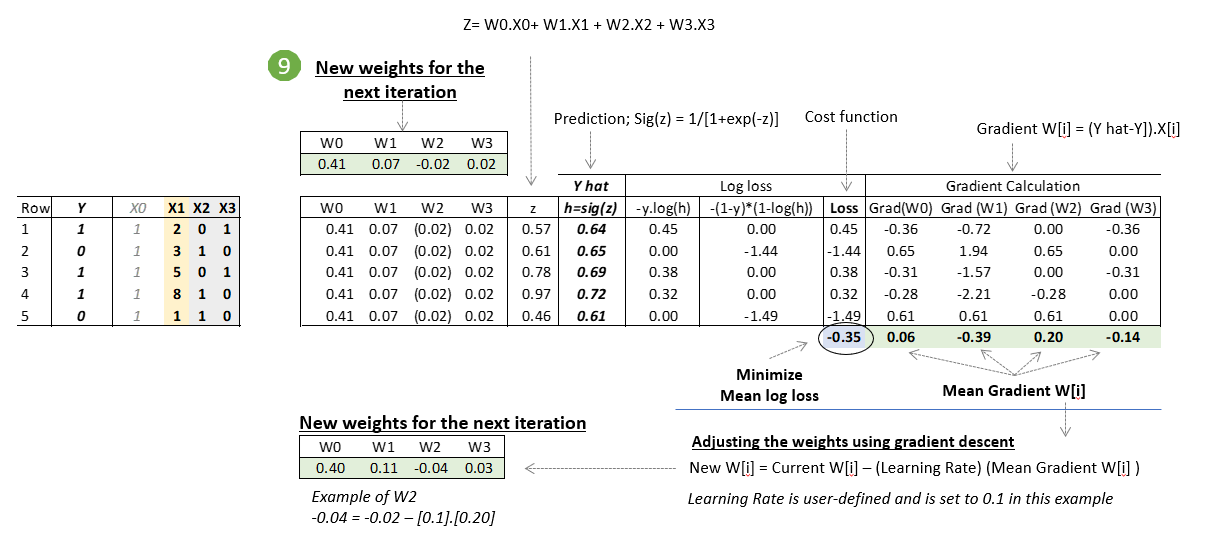

In [72]:
Image(filename="step2.png")

Here we have demonstrated logistic regression with gradient descent for only two iterations. We see that the loss from the first iteration is $-0.30$ and it is $-0.35$ in the second iteration.  But the algorithm will continue iterating steps 4 through 9 until we reach the specified stopping criteria and tries to minimize the loss while continually updating the weights after each iteration.  The goal for logistic regression with gradient descent is to minimize the loss so that the deviations between $Y$ (actuals) and $\hat{Y}$ (predictions) are relatively small values which will lead to good predictions as we classify the final outcome as $(Y = 1)$ if $(\hat{Y}$ >= $0.5)$ and $(Y = 0)$ otherwise.   

### Demo on sample dataset

The Criteo CTR prediction dataset has 13 numeric and 26 categorical variables.  For this demo, we have taken a 0.0025% sample of the original dataset which gave us 1121 records.  We then restricted the features to two continuous variables I11 and I5 and three categorical variables C6, C9 and C17.  I11 and I5 had the two highest correlation with the outcome variable 'Click' ( I11 had 13% correlation and I5 had -9% and these two are minimally correlated to each other).  We chose the categorical variables that had relatively fewer states and only a few missing values.  C6 has 6 states, C9 has 2 states and C17 has 9 states.  We then dropped all the rows that contained missing values which resulted in the final toy dataset having 937 records.

Based on the EDA, we initialized $p = 0.25$ as roughly 25% of the dataset has a click value of $1$.  The code for the following demo can be found at https://github.com/UCB-w261/f19-final-project-team-3/blob/master/FinalProject/final_project_anu.ipynb

In [44]:
toy_df.head()

,click,I11,I5,C6,C9,C17
0,0,1.0,4410.0,6f6d9be8,a73ee510,e5ba7672
1,0,1.0,4599.0,7e0ccccf,a73ee510,e5ba7672
2,1,1.0,57.0,fbad5c96,a73ee510,e5ba7672
3,1,3.0,8.0,6f6d9be8,a73ee510,e5ba7672
4,1,7.0,541.0,7e0ccccf,a73ee510,e5ba7672


Using this sample dataset, we explored two approaches to handling categorical variables : 
* one-hot encoding 
* hashing

**One-Hot Encoding**

One-hot encoding of a variable  involves taking one categorical variable that has N levels and creates (N-1) new columns of vectors.  Each vector has 1 representing the presence of that state or 0 when that state is not on.  The 1st state has been left out as it can be inferred from the others.  Below is a how the data looks like after on-hot encoding.  The numerical features here have been standardized using sklearn.preprocessing.StandardScaler().


In [46]:
toy_ohe.head()

,click,I11,I5,C6_3bf701e7,C6_6f6d9be8,C6_7e0ccccf,C6_fbad5c96,C6_fe6b92e5,C9_a73ee510,C17_1e88c74f,C17_27c07bd6,C17_3486227d,C17_776ce399,C17_8efede7f,C17_d4bb7bd8,C17_e5ba7672
0,0,-0.341642,-0.156874,0,1,0,0,0,1,0,0,0,0,0,0,1
1,0,-0.341642,-0.153209,0,0,1,0,0,1,0,0,0,0,0,0,1
2,1,-0.341642,-0.241284,0,0,0,1,0,1,0,0,0,0,0,0,1
3,1,-0.048627,-0.242234,0,1,0,0,0,1,0,0,0,0,0,0,1
4,1,0.537401,-0.231899,0,0,1,0,0,1,0,0,0,0,0,0,1


Here is a sample output of the log loss computed by the algorithm on one-hot encoded data.

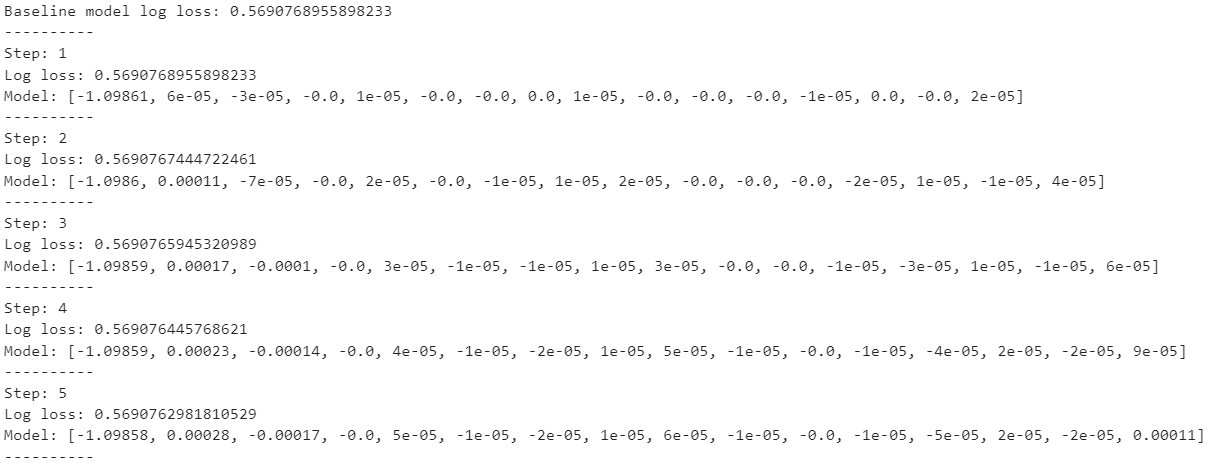

In [48]:
from IPython.display import Image
Image(filename="ohe_loss.png")

**Hashing**

Next we look at hashing the features.  We have used Murmurhash3 for the Spark implemetation but the toy example here uses the hash in Pandas.  We take a modulo of the hashed value using a fixed number of states (= 5) and then one-hot encoding the resulting categorical columns.  The numerical columns are standardized using sklearn.preprocessing.StandardScaler().  Lets take a look at the hashed and normalized data.


In [54]:
toy_hash.head()

,click,I11,I5,C6_0,C6_1,C6_2,C6_3,C6_4,C9_0,C9_1,C9_2,C9_3,C9_4,C17_0,C17_1,C17_2,C17_3,C17_4
0,0,-0.341642,-0.156874,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
1,0,-0.341642,-0.153209,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,1,-0.341642,-0.241284,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
3,1,-0.048627,-0.242234,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
4,1,0.537401,-0.231899,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0


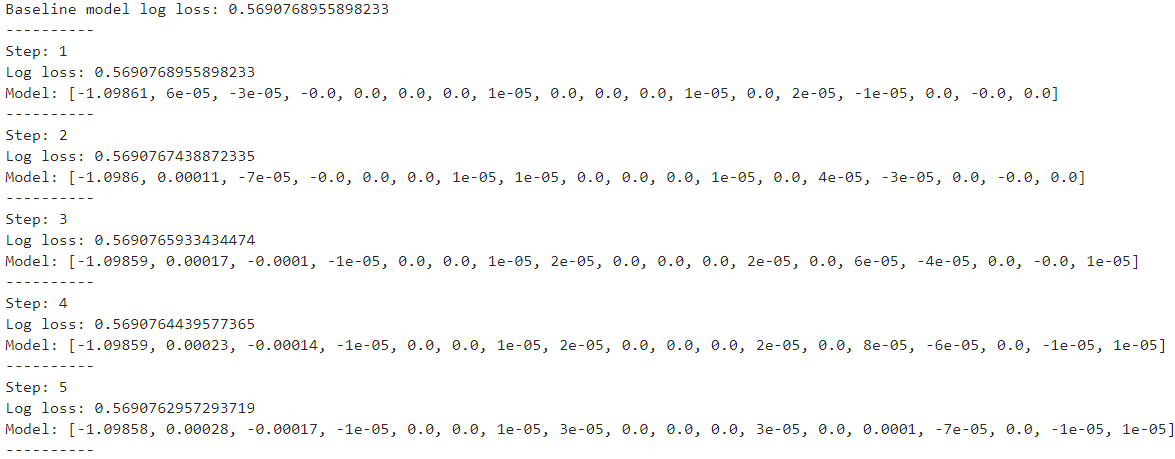

In [55]:
from IPython.display import Image
Image(filename="hash_loss.png")

The In both the above outputs, we see that the loss is gradually decreasing and that the model weights are getting updated in each iteration.  This demonstates how the logistic regression algorithm works. 

While one-hot encoding is easy to conceptualize, there are practical disadvantages in implementing a full-scale model.  One, the columns of the 
matrix increases by the number of categorical variables and by the number of levels of each categorial variable.  Second, missing data might need 
to be modelled as its own level.  Third, the matrix also becomes sparse which would make it computationally expensive to implement.  Finally, one-hot encoding has to be done as a pre-processing step as it doesn't lend to parallelization.

Hashing produced more columns in this demo dataset than the on-hot encoding approach because we started with categorical columns with the fewest states.  But the hashing approach will reduce the dimensionality when applied to the original dataset.  

Both these approaches have been implemented and will be explained in detail in the section 4 of this notebook.

### Demo Code in Python, Pandas and NumPy

Python program to demonstrate the theory of logistic regression with gradient descent.

In [1]:
# import libraries

import ast
import time
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
# Logistic Regression Model
def fit_new(features, labels, model, lr=0.01, num_iter=10, verbose=True):
    """
    Fit logistic regression model
    Input:
        features (array) - feature array
        labels (array) - class labels
        w (array) - model coefficients with bias coefficient at index 0
        lr (scalar) - learning rate parameter with default 0.1
        num_iter (integer) - number of training iterations
        verbose (boolean) - option to print log of each iteration
    """
    
    model_hist, loss_hist = [], []
    
    # baseline
    z = np.dot(features, model)
    h = 1.0 / (1 + np.exp(-z))
    loss = (-labels * np.log(h) -(1 - labels) * np.log(1 - h)).mean()
    print(f'Baseline model log loss: {loss}')
    
    for i in range(num_iter):
        
        ######################################
        
        # logistic function
        z = np.dot(features, model)
        h = 1.0 / (1 + np.exp(-z))
        
        
        # cost function
        loss = (-labels * np.log(h) -(1 - labels) * np.log(1 - h)).mean()
        
        # gradient
        gradient = np.dot(features.T, (h - np.squeeze(labels))) / labels.size
        
        # update model weights
        model -= lr * gradient
        
        ######################################
        
        model_hist.append(model)
        loss_hist.append(loss)
        if verbose :
        #if (i%2) == 0:
            print('----------')
            print(f'Step: {i+1}')
            print(f'Log loss: {loss}')
            print(f'Model: {[round(w,5) for w in model]}')
    print('----------')
    print(f'Final log loss: {loss}') 
    return model_hist, loss_hist

In [33]:
# Augment the feature array with the bias term
def augment(X):
    """
    Takes an np.array whose rows are data points and augments each
    each row with a 1.0 in the first position to represent the bias.
    """
    return np.insert(X, 0, 1.0, axis=1)

The following toy dataset has been created for demonstrating the logistic regression algorithm.  It is an approximate 0.0025% sample of the CTR data, with two numeric and three categorical features. Only complete rows were considered for this dataset, NaNs have been dropped.

In [2]:
# read toy dataset with 6 columns (click - outcome; I11, I5, C6, C9, C17 - predictors selected for toy example)
toy_df = pd.read_csv("toy_data.csv", sep = '\t', usecols = ['click', 'I11', 'I5', 'C6', 'C9', 'C17'])

In [3]:
toy_df.head()

,click,I11,I5,C6,C9,C17
0,0,1.0,4410.0,6f6d9be8,a73ee510,e5ba7672
1,0,1.0,4599.0,7e0ccccf,a73ee510,e5ba7672
2,1,1.0,57.0,fbad5c96,a73ee510,e5ba7672
3,1,3.0,8.0,6f6d9be8,a73ee510,e5ba7672
4,1,7.0,541.0,7e0ccccf,a73ee510,e5ba7672


In [4]:
len(toy_df)

937

This dataset has two numeric and contains only complete rows.  C6 has 6 states, C9 has 2 states and C17 has 9 states.

In [5]:
toy_df['C6'].unique()

array(['6f6d9be8', '7e0ccccf', 'fbad5c96', 'fe6b92e5', '13718bbd',
       '3bf701e7'], dtype=object)

In [6]:
toy_df['C9'].unique()

array(['a73ee510', '7cc72ec2'], dtype=object)

In [7]:
toy_df['C17'].unique()

array(['e5ba7672', '27c07bd6', '07c540c4', 'd4bb7bd8', '1e88c74f',
       '8efede7f', '3486227d', '776ce399'], dtype=object)

#### One-Hot Encoding

The categorical columns are one-hot encoded using the pandas get_dummies function.  The first value of each categorical variable is dropped in this process.

In [9]:
df = toy_df.copy()

In [10]:
df = pd.concat([df, pd.get_dummies(df['C6'], prefix = 'C6', drop_first = True)], axis = 1)

In [11]:
df = pd.concat([df, pd.get_dummies(df['C9'], prefix = 'C9', drop_first = True)], axis = 1)

In [12]:
df = pd.concat([df, pd.get_dummies(df['C17'], prefix = 'C17', drop_first = True)], axis = 1)

Create a copy of the dataframe and drop the original categorical columns.

In [13]:
toy_ohe = df.copy()

In [14]:
toy_ohe = toy_ohe.drop(columns = ['C6', 'C9', 'C17'])

Normalize the numerical columns using sklearn.preprocessing.StandarScaler() which applies the (x - mean)/sd method.

In [16]:
# Normalize numeric columns using sklearn.preprocessing.StandardScaler() initialized earlier

from sklearn import preprocessing
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit data on the scaler object

toy_ohe[['I11', 'I5']] = scaler.fit_transform(toy_ohe[['I11', 'I5']])

In [51]:
toy_ohe.head()

,click,I11,I5,C6_3bf701e7,C6_6f6d9be8,C6_7e0ccccf,C6_fbad5c96,C6_fe6b92e5,C9_a73ee510,C17_1e88c74f,C17_27c07bd6,C17_3486227d,C17_776ce399,C17_8efede7f,C17_d4bb7bd8,C17_e5ba7672
0,0,-0.341642,-0.156874,0,1,0,0,0,1,0,0,0,0,0,0,1
1,0,-0.341642,-0.153209,0,0,1,0,0,1,0,0,0,0,0,0,1
2,1,-0.341642,-0.241284,0,0,0,1,0,1,0,0,0,0,0,0,1
3,1,-0.048627,-0.242234,0,1,0,0,0,1,0,0,0,0,0,0,1
4,1,0.537401,-0.231899,0,0,1,0,0,1,0,0,0,0,0,0,1


In [54]:
toy_ohe.to_csv('toy_ohe.txt', sep='\t', encoding='utf-8', header=True)

In [49]:
toy_ohe = pd.read_csv("toy_ohe.txt", sep = '\t')

Now that we have the on-hot encoded data, we define the logistic regression model next. 

In [50]:
# define baseline model 
# p = 0.25 approx. estimate from EDA
p = 0.25
logit = np.log(p/(1-p))

# set bias = logit and weights = 0 
baseline_model = np.append(logit, np.repeat(0, 15)) 
baseline_model

array([-1.09861229,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ])

In [51]:
# Run this cell as-is only once - if starting from loading data
# split labels and features into two numpy arrays
X = toy_ohe.values
labels = X[:, [0]]
features = X[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]]
features = augment(features)


In [52]:
features[0]

array([ 1.        , -0.34164159, -0.15687403,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        1.        ])

In [53]:
%%time
models, losses = fit_new(features, labels, baseline_model, lr=0.001, num_iter=20, verbose=True)

Baseline model log loss: 0.5690768955898233
----------
Step: 1
Log loss: 0.5690768955898233
Model: [-1.09861, 6e-05, -3e-05, -0.0, 1e-05, -0.0, -0.0, 0.0, 1e-05, -0.0, -0.0, -0.0, -1e-05, 0.0, -0.0, 2e-05]
----------
Step: 2
Log loss: 0.5690767444722458
Model: [-1.0986, 0.00011, -7e-05, -0.0, 2e-05, -0.0, -1e-05, 1e-05, 2e-05, -0.0, -0.0, -0.0, -2e-05, 1e-05, -1e-05, 4e-05]
----------
Step: 3
Log loss: 0.5690765945320986
Model: [-1.09859, 0.00017, -0.0001, -0.0, 3e-05, -1e-05, -1e-05, 1e-05, 3e-05, -0.0, -0.0, -1e-05, -3e-05, 1e-05, -1e-05, 6e-05]
----------
Step: 4
Log loss: 0.5690764457686205
Model: [-1.09859, 0.00023, -0.00014, -0.0, 4e-05, -1e-05, -2e-05, 1e-05, 5e-05, -1e-05, -0.0, -1e-05, -4e-05, 2e-05, -2e-05, 9e-05]
----------
Step: 5
Log loss: 0.5690762981810524
Model: [-1.09858, 0.00028, -0.00017, -0.0, 5e-05, -1e-05, -2e-05, 1e-05, 6e-05, -1e-05, -0.0, -1e-05, -5e-05, 2e-05, -2e-05, 0.00011]
----------
Step: 6
Log loss: 0.5690761517686337
Model: [-1.09858, 0.00034, -0.00021,

#### Hashing

Though one-hot encoding of categorical variables is a proven approach, the full dataset has 26 categorical variables, some of which have 800+ states.  One-hot encoding all of the categorical variables would produce a very large sparse feature matrix.  So we consider hashing as an alternative method for handling categorical data.

In our Spark implementation, we are hashing all variables.  But in this example, only the categorical variables are hashed. Here we have used the pandas hash function

In [5]:
# Run only one and write out file as hash generates a new value each time it is applied.
toy_hash = toy_df.copy()
toy_hash['C17'] = toy_hash['C17'].apply(hash)
toy_hash['C6'] = toy_hash['C6'].apply(hash)
toy_hash['C9'] = toy_hash['C9'].apply(hash)

In [6]:
toy_hash.head()

,click,I11,I5,C6,C9,C17
0,0,1.0,4410.0,-3747436364206923191,4649493103128598933,3477674460787557565
1,0,1.0,4599.0,690343864082539630,4649493103128598933,3477674460787557565
2,1,1.0,57.0,-640776791615414661,4649493103128598933,3477674460787557565
3,1,3.0,8.0,-3747436364206923191,4649493103128598933,3477674460787557565
4,1,7.0,541.0,690343864082539630,4649493103128598933,3477674460787557565


As we are using 5 levels of each categorical variable to implement the hashing trick, we will do the same here.  The hashing trick will be elaborated in the implementation section.

In [7]:
toy_hash['C17'] = toy_hash['C17'] % 5

In [9]:
toy_hash['C6'] = toy_hash['C6'] % 5

In [10]:
toy_hash['C9'] = toy_hash['C9'] % 5

Then we on-hot encode the hashed categorical variables

In [12]:
toy_hash = pd.concat([toy_hash, pd.get_dummies(toy_hash['C6'], prefix = 'C6')], axis = 1)
toy_hash = pd.concat([toy_hash, pd.get_dummies(toy_hash['C9'], prefix = 'C9')], axis = 1)
toy_hash = pd.concat([toy_hash, pd.get_dummies(toy_hash['C17'], prefix = 'C17')], axis = 1)

In [14]:
# add dummy cols for any value that did not appear in the above one-hot encoding
toy_hash['C6_1'] = 0
toy_hash['C6_2'] = 0
toy_hash['C9_0'] = 0
toy_hash['C9_1'] = 0
toy_hash['C9_2'] = 0
toy_hash['C9_4'] = 0
toy_hash['C17_2'] = 0

In [18]:
# drop original columns
toy_hash = toy_hash.drop(columns = ['C6', 'C9', 'C17'])

In [24]:
cols = ['click', 'I11', 'I5', 'C6_0', 'C6_1', 'C6_2', 'C6_3', 'C6_4', 'C9_0', 'C9_1', 'C9_2', 'C9_3', 'C9_4', 'C17_0', 'C17_1', 'C17_2', 'C17_3', 'C17_4']

In [25]:
toy_hash = toy_hash[cols]

In [26]:
toy_hash.head()

,click,I11,I5,C6_0,C6_1,C6_2,C6_3,C6_4,C9_0,C9_1,C9_2,C9_3,C9_4,C17_0,C17_1,C17_2,C17_3,C17_4
0,0,-0.341642,-0.156874,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
1,0,-0.341642,-0.153209,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,1,-0.341642,-0.241284,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
3,1,-0.048627,-0.242234,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
4,1,0.537401,-0.231899,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0


Standardizing data : sklearn.StandardScaler() does (x - mean / sd)

In [20]:
# Run once and write out file 
from sklearn import preprocessing
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit data on the scaler object
toy_hash[['I11', 'I5']] = scaler.fit_transform(toy_hash[['I11', 'I5']])


In [27]:
# create csv file of hashed and normalized data so that the categorical data remains same for future runs
toy_hash.to_csv("toy_hashed.txt", sep='\t', encoding='utf-8')

In [24]:
# read the hashed and normalized data if re-running as the hashing creates a different value each time the hash is applied
#toy_hash = pd.read_csv("toy_hashed.txt", sep = '\t')

In [29]:
toy_hash.head()

,click,I11,I5,C6_0,C6_1,C6_2,C6_3,C6_4,C9_0,C9_1,C9_2,C9_3,C9_4,C17_0,C17_1,C17_2,C17_3,C17_4
0,0,-0.341642,-0.156874,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
1,0,-0.341642,-0.153209,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,1,-0.341642,-0.241284,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
3,1,-0.048627,-0.242234,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
4,1,0.537401,-0.231899,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0


In [46]:
# define baseline model 
# p = 0.25 approx. estimate from EDA
p = 0.25
logit = np.log(p/(1-p))

# set bias = logit and weights = 0 
baseline_model = np.append(logit, np.repeat(0, 17)) 
baseline_model

array([-1.09861229,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ])

In [35]:
# Run this cell as-is only once - if starting from loading data
# split labels and features into two numpy arrays
X = toy_hash.values
labels = X[:, [0]]
features = X[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]]
features = augment(features)


In [47]:
features[0]

array([ 1.        , -0.34164159, -0.15687403,  0.        ,  0.        ,
        0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  0.        ,  0.        ])

In [48]:
%%time
models, losses = fit_new(features, labels, baseline_model, lr=0.001, num_iter=20, verbose=True)

Baseline model log loss: 0.5690768955898233
----------
Step: 1
Log loss: 0.5690768955898233
Model: [-1.09861, 6e-05, -3e-05, -0.0, 0.0, 0.0, 0.0, 1e-05, 0.0, 0.0, 0.0, 1e-05, 0.0, 2e-05, -1e-05, 0.0, -0.0, 0.0]
----------
Step: 2
Log loss: 0.5690767438872335
Model: [-1.0986, 0.00011, -7e-05, -0.0, 0.0, 0.0, 1e-05, 1e-05, 0.0, 0.0, 0.0, 1e-05, 0.0, 4e-05, -3e-05, 0.0, -0.0, 0.0]
----------
Step: 3
Log loss: 0.5690765933434474
Model: [-1.09859, 0.00017, -0.0001, -1e-05, 0.0, 0.0, 1e-05, 2e-05, 0.0, 0.0, 0.0, 2e-05, 0.0, 6e-05, -4e-05, 0.0, -0.0, 1e-05]
----------
Step: 4
Log loss: 0.5690764439577365
Model: [-1.09859, 0.00023, -0.00014, -1e-05, 0.0, 0.0, 1e-05, 2e-05, 0.0, 0.0, 0.0, 2e-05, 0.0, 8e-05, -6e-05, 0.0, -1e-05, 1e-05]
----------
Step: 5
Log loss: 0.5690762957293719
Model: [-1.09858, 0.00028, -0.00017, -1e-05, 0.0, 0.0, 1e-05, 3e-05, 0.0, 0.0, 0.0, 3e-05, 0.0, 0.0001, -7e-05, 0.0, -1e-05, 1e-05]
----------
Step: 6
Log loss: 0.5690761486576251
Model: [-1.09858, 0.00034, -0.00021,